In [1]:
import sys
sys.path.append("..")

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

In [3]:
cd ~/Desktop/QCD_aware/Pytorch_code/Pytorch_simple/

/Users/dipsikhadebnath/Desktop/QCD_aware/Pytorch_code/Pytorch_simple


In [22]:
import numpy as np
np.seterr(divide="ignore")
import pickle
import pandas as pd
import glob
import os
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [4]:
import pickle
fd = open("ytrue_ypred_50.pickle","rb")
ytrue,ypred = pickle.load(fd)
fd.close()

In [7]:
roc_auc = roc_auc_score(ytrue,ypred) 
accuracy=np.sum(np.rint(ypred)==ytrue)/float(len(ytrue)) 
print("ROC_AUC:", roc_auc)
print("test accuracy:",accuracy)



ROC_AUC: 0.9786044874759159
test accuracy: 0.9250775


1/fpr at tpr=30% -> 701.9891656954873


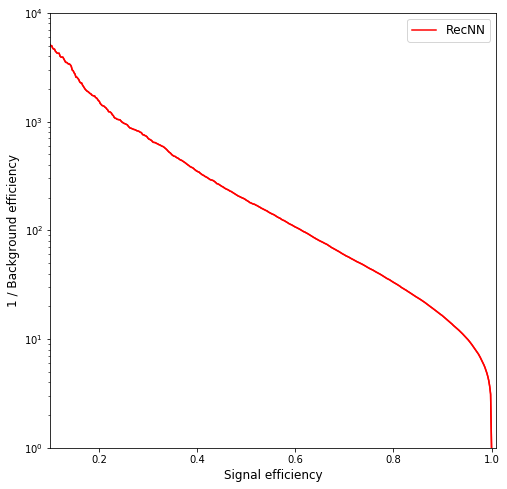

In [15]:
fprs=[]
tprs=[]
fpr,tpr,_=roc_curve(ytrue, ypred)
fprs.append(fpr)
tprs.append(tpr)

inv_fprs = []
base_tpr = np.linspace(0.05, 1, 500)
    
for fpr, tpr in zip(fprs, tprs):
    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)
    plt.semilogy(base_tpr, inv_fpr, color="red")
        
    inv_fprs = np.array(inv_fprs)
    mean_inv_fprs = inv_fprs.mean(axis=0)


    plt.plot(base_tpr, mean_inv_fprs, color="red",label="RecNN")
    plt.xlabel("Signal efficiency",fontsize=12)
    plt.ylabel("1 / Background efficiency",fontsize=12)
    plt.xlim([0.1, 1.01])
    plt.ylim(1, 10000)
    plt.yscale("log")
    plt.legend(loc="best",fontsize=12)
    print("1/fpr at tpr=30% ->",np.interp(0.3, base_tpr, mean_inv_fprs))

In [23]:
pd.DataFrame(confusion_matrix(ytrue,np.rint(ypred)))

,0,1
0,183582,16392
1,13577,186449


In [19]:
print(classification_report(ytrue, np.rint(ypred)))

             precision    recall  f1-score   support

        0.0       0.93      0.92      0.92    199974
        1.0       0.92      0.93      0.93    200026

avg / total       0.93      0.93      0.93    400000

